In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
intents= [
    {"tag": "greeting",
     "patterns": ["Hi", "Hey", "Is anyone there?", "Hello", "Hay","Hello"
                ,"Hi there!",
                "Good morning!",
                "Hey!",
                "Hi 😊",
                "Yo!",
                "Greetings, chatbot!",
                "Hiya!",
                "Hey bot, what's up?",
                "I'm back!"],
     "responses": ["Hello", "Hi", "Hi there""Greetings! How may I assist you today?",
                   "Hey! Welcome! What can I do for you?",
                   "Good morning! Rise and shine! How can I help you today?",
                   "Hello! What brings you here today? Any specific questions or tasks on your mind?",
                   "Hello! 😊 Great to see you! How can I make your day better?",
                   "Yo! Nice to have you here. What can I do for you today?",
                   "Greetings! Feel free to ask me anything or let me know what you need assistance with.",
                   "Hiya! Ready to tackle the day? How can I assist you on your mission?",
                   "Not much, just living the bot life! What's up with you?",                  
                   "Welcome back! It's always a pleasure to have you here. How can I help you today", ]
    },
    {"tag": "goodbye",
     "patterns": ["Bye", "See you later", "Goodbye",
    "See ya!",
    "Farewell",
    "Goodbye, chatbot!",
    "I'm heading out",
    "Thanks for your help. Goodbye!",
    "Bye, bot!",
    "Signing off now!",
    "Leaving for now"],
     "responses": ["See you later", "Have a nice day", "Bye! Come back again",
                  "Goodbye! If you have any more questions in the future, feel free to reach out. Have a great day!",
    "See ya! If you ever need assistance again, I'll be right here. Take care!",
    "Farewell! It was a pleasure assisting you. If you need help in the future, don't hesitate to ask.",
    "Goodbye! It was wonderful chatting with you. Feel free to return whenever you like. Take care!",
    "Got it! If you ever return and have more questions, I'll be here. Safe travels and goodbye!",
    "You're welcome! If you ever need assistance again, don't hesitate to ask. Goodbye and have a fantastic day!",
    "Goodbye! It was a pleasure assisting you. If you ever miss our chats, just drop by. Take care!",
    "Signing off with a smile! If you need anything later, I'll be here. Goodbye and take it easy!",
    "Leaving for now? No worries! Whenever you're ready to return, I'll be here to help. Goodbye for now!",
    "Goodbye, [User]! It was a pleasure assisting you. If you ever come back, I'll be here to help. Take care!"]
    },
    {"tag": "thanks",
     "patterns": ["Thanks", "Thank you", "That's helpful", "Thanks for the help"
                 "Thank you so much!",
    "Thanks a bunch!",
    "I appreciate your help, thanks.",
    "Thanks for your time.",
    "Thanks a million!",
    "Thanks for the guidance.",
    "Thanks, chatbot!",
    "Thanks for the support."],
     "responses": ["Happy to help!", "Any time!", "My pleasure", "You're most welcome!",
                  "You're welcome! If you have any more questions or need further assistance, feel free to ask.",
    "You're very welcome! I'm here to help. If there's anything else you need, just let me know.",
    "No problem! If you ever need assistance again, I'm just a message away. Happy to help!",
    "I'm glad I could assist you! If you ever run into more questions, don't hesitate to reach out. Thank you for using our service!",
    "You're welcome! I'm here whenever you need assistance. Feel free to reach out at any time.",
    "A million thanks to you too! If there's anything else I can do for you, just let me know.",
    "You're welcome! I'm here to guide you whenever you need assistance. If you have more questions, feel free to ask.",
    "You're welcome! It's always a pleasure assisting you. If you have more tasks or questions, I'm here to help.",
    "You're very welcome! If you ever need support again, don't hesitate to reach out. Have a great day!",
    "You're welcome, [User]! If there's anything else I can do for you, just let me know. Thank you for using our service!"]
                   },
    {"tag": "about",
     "patterns": ["Who are you?", "What are you?", "Who you are?" ],
     "responses": ["I.m Joana, your bot assistant", "I'm Joana, an Artificial Intelligent bot"]
    },
    {"tag": "name",
    "patterns": ["what is your name", "what should I call you", "whats your name?"],
    "responses": ["You can call me Joana.", "I'm Joana!", "Just call me as Joana"]
    },
    {"tag": "help",
    "patterns": ["Could you help me?", "give me a hand please", "Can you help?", "What can you do for me?", "I need a support", "I need a help", "support me please"],
    "responses": ["Tell me how can assist you", "Tell me your problem to assist you", "Yes Sure, How can I support you"]
    },
    {"tag": "createaccount",
    "patterns": ["I need to create a new account", "how to open a new account", "I want to create an account", "can you create an account for me", "how to open a new account"],
    "responses": ["You can just easily create a new account from our web site", "Just go to our web site and follow the guidelines to create a new account"]
    },
    {"tag": "complaint",
    "patterns": ["have a complaint", "I want to raise a complaint", "there is a complaint about a service"],
    "responses": ["Please provide us your complaint in order to assist you", "Please mention your complaint, we will reach you and sorry for any inconvenience caused"]
    }
]


In [39]:
data={"intents": [
    {"tag": "greeting",
     "patterns": ["Hi", "Hey", "Is anyone there?", "Hello", "Hay","Hello"
                ,"Hi there!",
                "Good morning!",
                "Hey!",
                "Hi 😊",
                "Yo!",
                "Greetings, chatbot!",
                "Hiya!",
                "Hey bot, what's up?",
                "I'm back!"],
     "responses": ["Hello", "Hi", "Hi there""Greetings! How may I assist you today?",
                   "Hey! Welcome! What can I do for you?",
                   "Good morning! Rise and shine! How can I help you today?",
                   "Hello! What brings you here today? Any specific questions or tasks on your mind?",
                   "Hello! 😊 Great to see you! How can I make your day better?",
                   "Yo! Nice to have you here. What can I do for you today?",
                   "Greetings! Feel free to ask me anything or let me know what you need assistance with.",
                   "Hiya! Ready to tackle the day? How can I assist you on your mission?",
                   "Not much, just living the bot life! What's up with you?",                  
                   "Welcome back! It's always a pleasure to have you here. How can I help you today", ]
    },
    {"tag": "goodbye",
     "patterns": ["Bye", "See you later", "Goodbye",
    "See ya!",
    "Farewell",
    "Goodbye, chatbot!",
    "I'm heading out",
    "Thanks for your help. Goodbye!",
    "Bye, bot!",
    "Signing off now!",
    "Leaving for now"],
     "responses": ["See you later", "Have a nice day", "Bye! Come back again",
                  "Goodbye! If you have any more questions in the future, feel free to reach out. Have a great day!",
    "See ya! If you ever need assistance again, I'll be right here. Take care!",
    "Farewell! It was a pleasure assisting you. If you need help in the future, don't hesitate to ask.",
    "Goodbye! It was wonderful chatting with you. Feel free to return whenever you like. Take care!",
    "Got it! If you ever return and have more questions, I'll be here. Safe travels and goodbye!",
    "You're welcome! If you ever need assistance again, don't hesitate to ask. Goodbye and have a fantastic day!",
    "Goodbye! It was a pleasure assisting you. If you ever miss our chats, just drop by. Take care!",
    "Signing off with a smile! If you need anything later, I'll be here. Goodbye and take it easy!",
    "Leaving for now? No worries! Whenever you're ready to return, I'll be here to help. Goodbye for now!",
    "Goodbye, [User]! It was a pleasure assisting you. If you ever come back, I'll be here to help. Take care!"]
    },
    {"tag": "thanks",
     "patterns": ["Thanks", "Thank you", "That's helpful", "Thanks for the help"
                 "Thank you so much!",
    "Thanks a bunch!",
    "I appreciate your help, thanks.",
    "Thanks for your time.",
    "Thanks a million!",
    "Thanks for the guidance.",
    "Thanks, chatbot!",
    "Thanks for the support."],
     "responses": ["Happy to help!", "Any time!", "My pleasure", "You're most welcome!",
                  "You're welcome! If you have any more questions or need further assistance, feel free to ask.",
    "You're very welcome! I'm here to help. If there's anything else you need, just let me know.",
    "No problem! If you ever need assistance again, I'm just a message away. Happy to help!",
    "I'm glad I could assist you! If you ever run into more questions, don't hesitate to reach out. Thank you for using our service!",
    "You're welcome! I'm here whenever you need assistance. Feel free to reach out at any time.",
    "A million thanks to you too! If there's anything else I can do for you, just let me know.",
    "You're welcome! I'm here to guide you whenever you need assistance. If you have more questions, feel free to ask.",
    "You're welcome! It's always a pleasure assisting you. If you have more tasks or questions, I'm here to help.",
    "You're very welcome! If you ever need support again, don't hesitate to reach out. Have a great day!",
    "You're welcome, [User]! If there's anything else I can do for you, just let me know. Thank you for using our service!"]
                   },
    {"tag": "about",
     "patterns": ["Who are you?", "What are you?", "Who you are?" ],
     "responses": ["I.m Joana, your bot assistant", "I'm Joana, an Artificial Intelligent bot"]
    },
    {"tag": "name",
    "patterns": ["what is your name", "what should I call you", "whats your name?"],
    "responses": ["You can call me Joana.", "I'm Joana!", "Just call me as Joana"]
    },
    {"tag": "help",
    "patterns": ["Could you help me?", "give me a hand please", "Can you help?", "What can you do for me?", "I need a support", "I need a help", "support me please"],
    "responses": ["Tell me how can assist you", "Tell me your problem to assist you", "Yes Sure, How can I support you"]
    },
    {"tag": "createaccount",
    "patterns": ["I need to create a new account", "how to open a new account", "I want to create an account", "can you create an account for me", "how to open a new account"],
    "responses": ["You can just easily create a new account from our web site", "Just go to our web site and follow the guidelines to create a new account"]
    },
    {"tag": "complaint",
    "patterns": ["have a complaint", "I want to raise a complaint", "there is a complaint about a service"],
    "responses": ["Please provide us your complaint in order to assist you", "Please mention your complaint, we will reach you and sorry for any inconvenience caused"]
    }
]

}

In [10]:
classes=[i['tag'] for i in intents]
print(classes)
classes_to_index=dict()
for i,j in enumerate(classes):
    classes_to_index[j]=i

['greeting', 'goodbye', 'thanks', 'about', 'name', 'help', 'createaccount', 'complaint']


In [11]:
classes_to_index

{'greeting': 0,
 'goodbye': 1,
 'thanks': 2,
 'about': 3,
 'name': 4,
 'help': 5,
 'createaccount': 6,
 'complaint': 7}

In [12]:
training_sentences = []
training_labels = []
responses=[]
classes

['greeting',
 'goodbye',
 'thanks',
 'about',
 'name',
 'help',
 'createaccount',
 'complaint']

In [13]:
for i in intents:
    for j in i['patterns']:
        training_sentences.append(j)
        training_labels.append(i['tag'])
    responses.append(i['responses'])

In [14]:
(training_sentences)

['Hi',
 'Hey',
 'Is anyone there?',
 'Hello',
 'Hay',
 'Hello',
 'Hi there!',
 'Good morning!',
 'Hey!',
 'Hi 😊',
 'Yo!',
 'Greetings, chatbot!',
 'Hiya!',
 "Hey bot, what's up?",
 "I'm back!",
 'Bye',
 'See you later',
 'Goodbye',
 'See ya!',
 'Farewell',
 'Goodbye, chatbot!',
 "I'm heading out",
 'Thanks for your help. Goodbye!',
 'Bye, bot!',
 'Signing off now!',
 'Leaving for now',
 'Thanks',
 'Thank you',
 "That's helpful",
 'Thanks for the helpThank you so much!',
 'Thanks a bunch!',
 'I appreciate your help, thanks.',
 'Thanks for your time.',
 'Thanks a million!',
 'Thanks for the guidance.',
 'Thanks, chatbot!',
 'Thanks for the support.',
 'Who are you?',
 'What are you?',
 'Who you are?',
 'what is your name',
 'what should I call you',
 'whats your name?',
 'Could you help me?',
 'give me a hand please',
 'Can you help?',
 'What can you do for me?',
 'I need a support',
 'I need a help',
 'support me please',
 'I need to create a new account',
 'how to open a new account',


In [15]:
len(training_labels)

58

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
lbenc=LabelEncoder()
lbenc.fit(training_labels)
training_labels=lbenc.transform(training_labels)

In [18]:
training_labels

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 6, 6, 6, 5,
       5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 1, 1, 1])

In [19]:
lbenc.classes_

array(['about', 'complaint', 'createaccount', 'goodbye', 'greeting',
       'help', 'name', 'thanks'], dtype='<U13')

In [20]:
classes

['greeting',
 'goodbye',
 'thanks',
 'about',
 'name',
 'help',
 'createaccount',
 'complaint']

In [21]:
le_name_mapping = dict(zip(lbenc.classes_, lbenc.transform(lbenc.classes_)))

In [22]:
le_name_mapping

{'about': 0,
 'complaint': 1,
 'createaccount': 2,
 'goodbye': 3,
 'greeting': 4,
 'help': 5,
 'name': 6,
 'thanks': 7}

In [23]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

In [24]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)


In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
Total params: 29,992
Trainable params: 29,992
Non-trainable params: 0
____________________________________________________

In [26]:
epochs = 500
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)


Epoch 1/500
2/2 [==============================] - 6s 17ms/step - loss: 2.0776 - accuracy: 0.1897
Epoch 2/500
2/2 [==============================] - 0s 13ms/step - loss: 2.0723 - accuracy: 0.2586
Epoch 3/500
2/2 [==============================] - 0s 12ms/step - loss: 2.0677 - accuracy: 0.2586
Epoch 4/500
2/2 [==============================] - 0s 15ms/step - loss: 2.0624 - accuracy: 0.2586
Epoch 5/500
2/2 [==============================] - 0s 14ms/step - loss: 2.0564 - accuracy: 0.2586
Epoch 6/500
2/2 [==============================] - 0s 14ms/step - loss: 2.0493 - accuracy: 0.2586
Epoch 7/500
2/2 [==============================] - 0s 13ms/step - loss: 2.0402 - accuracy: 0.2586
Epoch 8/500
2/2 [==============================] - 0s 13ms/step - loss: 2.0320 - accuracy: 0.2586
Epoch 9/500
2/2 [==============================] - 0s 14ms/step - loss: 2.0203 - accuracy: 0.2586
Epoch 10/500
2/2 [==============================] - 0s 13ms/step - loss: 2.0068 - accuracy: 0.2586
Epoch 11/500
2/2 [=

2/2 [==============================] - 0s 13ms/step - loss: 0.5812 - accuracy: 0.8276
Epoch 84/500
2/2 [==============================] - 0s 14ms/step - loss: 0.5707 - accuracy: 0.8103
Epoch 85/500
2/2 [==============================] - 0s 13ms/step - loss: 0.5524 - accuracy: 0.8448
Epoch 86/500
2/2 [==============================] - 0s 14ms/step - loss: 0.5343 - accuracy: 0.8103
Epoch 87/500
2/2 [==============================] - 0s 14ms/step - loss: 0.5199 - accuracy: 0.8103
Epoch 88/500
2/2 [==============================] - 0s 14ms/step - loss: 0.5089 - accuracy: 0.8448
Epoch 89/500
2/2 [==============================] - 0s 13ms/step - loss: 0.4948 - accuracy: 0.8448
Epoch 90/500
2/2 [==============================] - 0s 14ms/step - loss: 0.4785 - accuracy: 0.8621
Epoch 91/500
2/2 [==============================] - 0s 13ms/step - loss: 0.4619 - accuracy: 0.8448
Epoch 92/500
2/2 [==============================] - 0s 15ms/step - loss: 0.4505 - accuracy: 0.8448
Epoch 93/500
2/2 [=====

2/2 [==============================] - 0s 15ms/step - loss: 0.0225 - accuracy: 1.0000
Epoch 166/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0221 - accuracy: 1.0000
Epoch 167/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0215 - accuracy: 1.0000
Epoch 168/500
2/2 [==============================] - 0s 15ms/step - loss: 0.0204 - accuracy: 1.0000
Epoch 169/500
2/2 [==============================] - 0s 12ms/step - loss: 0.0199 - accuracy: 1.0000
Epoch 170/500
2/2 [==============================] - 0s 15ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 171/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 172/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 173/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0177 - accuracy: 1.0000
Epoch 174/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 175/500


2/2 [==============================] - 0s 16ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 248/500
2/2 [==============================] - 0s 15ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 249/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 250/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 251/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 252/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 253/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 254/500
2/2 [==============================] - 0s 15ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 255/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 256/500
2/2 [==============================] - 0s 15ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 257/500


2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 330/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 331/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 332/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 333/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 334/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 335/500
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 336/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 337/500
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 338/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 339/500


2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 412/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 413/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 414/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 415/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 416/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 417/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 418/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 419/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 420/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 421/500


2/2 [==============================] - 0s 12ms/step - loss: 7.8483e-04 - accuracy: 1.0000
Epoch 492/500
2/2 [==============================] - 0s 13ms/step - loss: 7.8075e-04 - accuracy: 1.0000
Epoch 493/500
2/2 [==============================] - 0s 11ms/step - loss: 7.7614e-04 - accuracy: 1.0000
Epoch 494/500
2/2 [==============================] - 0s 12ms/step - loss: 7.7476e-04 - accuracy: 1.0000
Epoch 495/500
2/2 [==============================] - 0s 12ms/step - loss: 7.6982e-04 - accuracy: 1.0000
Epoch 496/500
2/2 [==============================] - 0s 12ms/step - loss: 7.6545e-04 - accuracy: 1.0000
Epoch 497/500
2/2 [==============================] - 0s 12ms/step - loss: 7.6258e-04 - accuracy: 1.0000
Epoch 498/500
2/2 [==============================] - 0s 12ms/step - loss: 7.5844e-04 - accuracy: 1.0000
Epoch 499/500
2/2 [==============================] - 0s 12ms/step - loss: 7.5553e-04 - accuracy: 1.0000
Epoch 500/500
2/2 [==============================] - 0s 12ms/step - loss: 7.51

In [27]:
loss=pd.DataFrame(model.history.history)

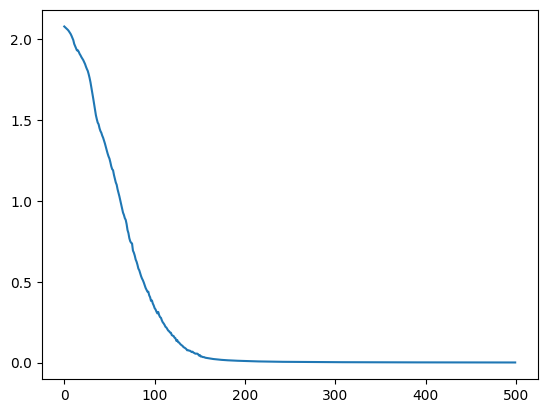

In [28]:
plt.plot(loss['loss'])

In [29]:
model.save("chat_model.h5")


In [33]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random


def chat():

    max_len = 20
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbenc.inverse_transform([np.argmax(result)])

        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!
User: whats up
1/1 [==============================] - 0s 25ms/step
ChatBot: Signing off with a smile! If you need anything later, I'll be here. Goodbye and take it easy!
User: yo
1/1 [==============================] - 0s 25ms/step
ChatBot: Hi
User: hey bot 
1/1 [==============================] - 0s 26ms/step
ChatBot: Hiya! Ready to tackle the day? How can I assist you on your mission?
User: hey bot whats up
1/1 [==============================] - 0s 25ms/step
ChatBot: Hello! What brings you here today? Any specific questions or tasks on your mind?
User: whats up
1/1 [==============================] - 0s 24ms/step
ChatBot: See you later
User: thanks a lot
1/1 [==============================] - 0s 25ms/step
ChatBot: Just call me as Joana
User: thanks a lot for help
1/1 [==============================] - 0s 24ms/step
ChatBot: My pleasure
User: quit
